In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [15]:
# --- Step 1: Load and Prepare the Data (OFFLINE VERSION) ---
print("--- Step 1: Loading and Preparing Data from Local Files---")

# **MODIFIED SECTION**
# Load the data from your local CSV files.
# Make sure your notebook and these CSV files are in the same folder,
# or provide the full path to the files (e.g., "C:/Users/YourUser/Downloads/mitbih_train.csv").
try:
    train_df = pd.read_csv("mitbih_train.csv", header=None)
    test_df = pd.read_csv("mitbih_test.csv", header=None)
    print("Files loaded successfully from local directory.")
except FileNotFoundError:
    print("ERROR: Make sure 'mitbih_train.csv' and 'mitbih_test.csv' are in the same folder as your script.")
    print("Please check the file paths and try again.")
    # Exit if files are not found
    exit()


--- Step 1: Loading and Preparing Data from Local Files---
Files loaded successfully from local directory.


In [16]:
# Combine the dataframes for easier processing
df = pd.concat([train_df, test_df], axis=0)

# Separate features (X) and labels (y)
# The first 187 columns are the ECG signal values (features)
X = df.iloc[:, :-1].values
# The last column is the heartbeat category (label)
y = df.iloc[:, -1].values

# Convert labels to one-hot encoding
# The model will output probabilities for each of the 5 classes.
y = to_categorical(y)

# Split the data into training and testing sets
# We'll use an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of training features (X_train): {X_train.shape}")
print(f"Shape of testing features (X_test): {X_test.shape}")
print(f"Shape of training labels (y_train): {y_train.shape}")
print(f"Shape of testing labels (y_test): {y_test.shape}")
print("-" * 30 + "\n")

Shape of training features (X_train): (87556, 187)
Shape of testing features (X_test): (21890, 187)
Shape of training labels (y_train): (87556, 5)
Shape of testing labels (y_test): (21890, 5)
------------------------------



In [17]:
# --- Step 2: Build the Artificial Neural Network (ANN) ---
print("--- Step 2: Building the ANN Model ---")

model = Sequential([
    # Input layer: 187 input features (ECG signal points)
    # First hidden layer: 64 neurons with ReLU activation
    Dense(64, activation='relu', input_shape=(187,)),
    
    # Second hidden layer: 32 neurons with ReLU activation
    Dense(32, activation='relu'),
    
    # Output layer: 5 neurons for the 5 classes, with softmax activation
    # Softmax ensures the output is a probability distribution.
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Good for multi-class classification
    metrics=['accuracy']
)

# Display the model's architecture
model.summary()
print("-" * 30 + "\n")

--- Step 2: Building the ANN Model ---


c:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,277 (55.77 KB)

 Trainable params: 14,277 (55.77 KB)

 Non-trainable params: 0 (0.00 B)

------------------------------



In [18]:
# --- Step 3: Train the Model ---
print("--- Step 3: Training the Model ---")
# Training the model and storing the history for plotting
history = model.fit(
    X_train, y_train,
    validation_split=0.1,  # Use 10% of training data for validation
    epochs=20,             # Number of times to iterate over the entire dataset
    batch_size=128,        # Number of samples per gradient update
    verbose=1
)
print("Model training complete.")
print("-" * 30 + "\n")

--- Step 3: Training the Model ---
Epoch 1/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9055 - loss: 0.3551 - val_accuracy: 0.9383 - val_loss: 0.2140
Epoch 2/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9462 - loss: 0.1943 - val_accuracy: 0.9531 - val_loss: 0.1632
Epoch 3/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9562 - loss: 0.1614 - val_accuracy: 0.9600 - val_loss: 0.1432
Epoch 4/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9614 - loss: 0.1415 - val_accuracy: 0.9667 - val_loss: 0.1298
Epoch 5/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9638 - loss: 0.1314 - val_accuracy: 0.9683 - val_loss: 0.1164
Epoch 6/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9669 - loss: 0.1210 - val_accuracy: 0.9698 - val_loss: 0.1094
Epoch 7/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9687 - loss: 0.1136 - val_accuracy: 0.9714 - val_loss: 0.1033
Epoch 8/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.970

In [19]:
# --- Step 4: Evaluate the Model and Visualize Results ---
print("--- Step 4: Evaluating Model and Visualizing Results ---")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


--- Step 4: Evaluating Model and Visualizing Results ---
Test Accuracy: 97.50%
Test Loss: 0.0924


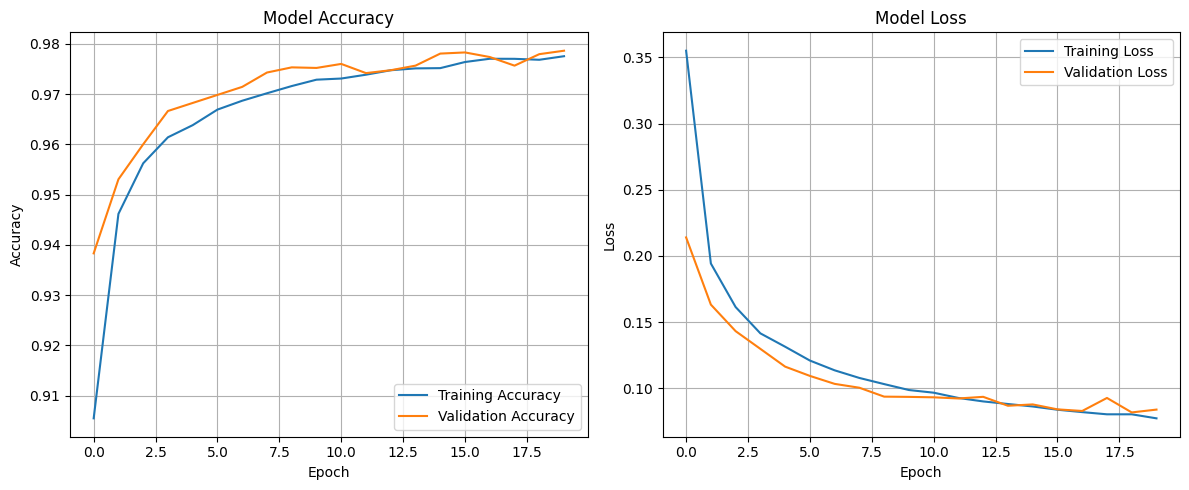

------------------------------



In [20]:
# Plotting Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
print("-" * 30 + "\n")

In [21]:
# --- Step 5: Test the Model with a Live ECG Signal ---
print("--- Step 5: Live Test with a Sample Signal ---")

# Define the class names for interpretation
CLASS_NAMES = {
    0: 'Normal Beat (N)',
    1: 'Supraventricular Ectopic Beat (S)',
    2: 'Ventricular Ectopic Beat (V)',
    3: 'Fusion Beat (F)',
    4: 'Unknown Beat (Q)'
}

# Example: Take a sample from the test set to simulate a live signal
# You can replace this with your own array of 187 float values.
sample_signal = X_test[10] 

# The model expects a batch of inputs, so we reshape a single sample
# from (187,) to (1, 187).
sample_signal_reshaped = np.reshape(sample_signal, (1, 187))

# Make a prediction
prediction = model.predict(sample_signal_reshaped)

# Get the index of the highest probability
predicted_class_index = np.argmax(prediction)

# Get the corresponding class name
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = prediction[0][predicted_class_index] * 100

print(f"Sample Signal Input (first 10 values): {sample_signal[:10]}...")
print(f"\nPrediction Probabilities: {prediction}")
print(f"\nPredicted Class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")
print("-" * 30 + "\n")

--- Step 5: Live Test with a Sample Signal ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Sample Signal Input (first 10 values): [1.         0.88850176 0.19163764 0.12543555 0.15679443 0.16376306
 0.13937283 0.16376306 0.16027875 0.15679443]...

Prediction Probabilities: [[9.4575822e-01 5.4051813e-02 1.8229026e-06 7.7877157e-05 1.1023729e-04]]

Predicted Class: Normal Beat (N)
Confidence: 94.58%
------------------------------



In [22]:
# To test with your own signal, create a NumPy array like this:
# my_ecg_signal = np.array([...187 values...])
# my_signal_reshaped = np.reshape(my_ecg_signal, (1, 187))
# my_prediction = model.predict(my_signal_reshaped)
# ... and so on